In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_noload = pd.read_csv('data/depth_gate/counts_nodedataload.csv')
data_noload

,level,num_qubits,swap_depth,cswap_depth,cswap_count,swap_count,h_count,x_count
0,2,9,7,6,6,7,3,6
1,3,18,9,15,22,13,8,22
2,4,35,11,25,58,23,13,58
3,5,68,13,35,134,41,22,134
4,6,133,15,45,290,75,39,290
5,7,262,17,55,606,141,72,606
6,8,519,19,65,1242,271,137,1242
7,9,1032,21,75,2518,529,266,2518
8,10,2057,23,85,5074,1043,523,5074
9,11,4106,25,95,10190,2069,1036,10190


In [12]:
swap_tele = pd.read_csv('data/depth_gate/h_tree.csv')
swap_tele = swap_tele[:12]
swap_tele

,level,tele_count,swap_count,tele_depth,swap_depth
0,2,0,2.0,0,2.0
1,3,12,6.0,12,6.0
2,4,24,16.0,24,16.0
3,5,60,50.0,40,40.0
4,6,192,156.0,84,96.0
5,7,504,434.0,140,196.0
6,8,1216,1136.0,208,384.0
7,9,2808,2790.0,288,684.0
8,10,6320,6620.0,380,1200.0
9,11,13992,15202.0,484,1980.0


In [16]:
data_load = pd.read_csv('data/depth_gate/counts_data.csv')[:12]
data_load

,level,num_qubits,swap_depth,cswap_depth,cswap_count,swap_count,h_count,x_count
0,2,9,8,8,8,8,2,8
1,3,18,10,18,28,14,5,28
2,4,35,12,28,72,24,6,72
3,5,68,14,38,164,42,7,164
4,6,133,16,48,352,76,8,352
5,7,262,18,58,732,142,9,732
6,8,519,20,68,1496,272,10,1496
7,9,1032,22,78,3028,530,11,3028
8,10,2057,24,88,6096,1044,12,6096
9,11,4106,26,98,12236,2070,13,12236


In [17]:
raw_cz = 22*data_load.cswap_count+swap_tele.swap_count*3 + data_load.swap_count*3
raw_czdepth = 22*data_load.cswap_depth+swap_tele.swap_depth*3 + data_load.swap_depth*3
tele_cz = 22*data_load.cswap_count+swap_tele.tele_count + data_load.swap_count*3
tele_czdepth = 22*data_load.cswap_depth+swap_tele.tele_depth + data_load.swap_depth*3
# noload_cz = 22*data_noload.cswap_count+ swap_tele.tele_count + data_noload.swap_count*3
# noload_czdepth = 22*data_noload.cswap_depth+ swap_tele.tele_depth + data_noload.swap_depth*3
subspace_cz = 12*data_noload.cswap_count+ swap_tele.tele_count + data_noload.swap_count*3
subspace_czdepth = 12*data_noload.cswap_depth+ swap_tele.tele_depth + data_noload.swap_depth*3
# subspace_cz = 22*data_noload.cswap_count+ swap_tele.tele_count + data_noload.swap_count*3
# subspace_czdepth = 22*data_noload.cswap_depth+ swap_tele.tele_depth + data_noload.swap_depth*3


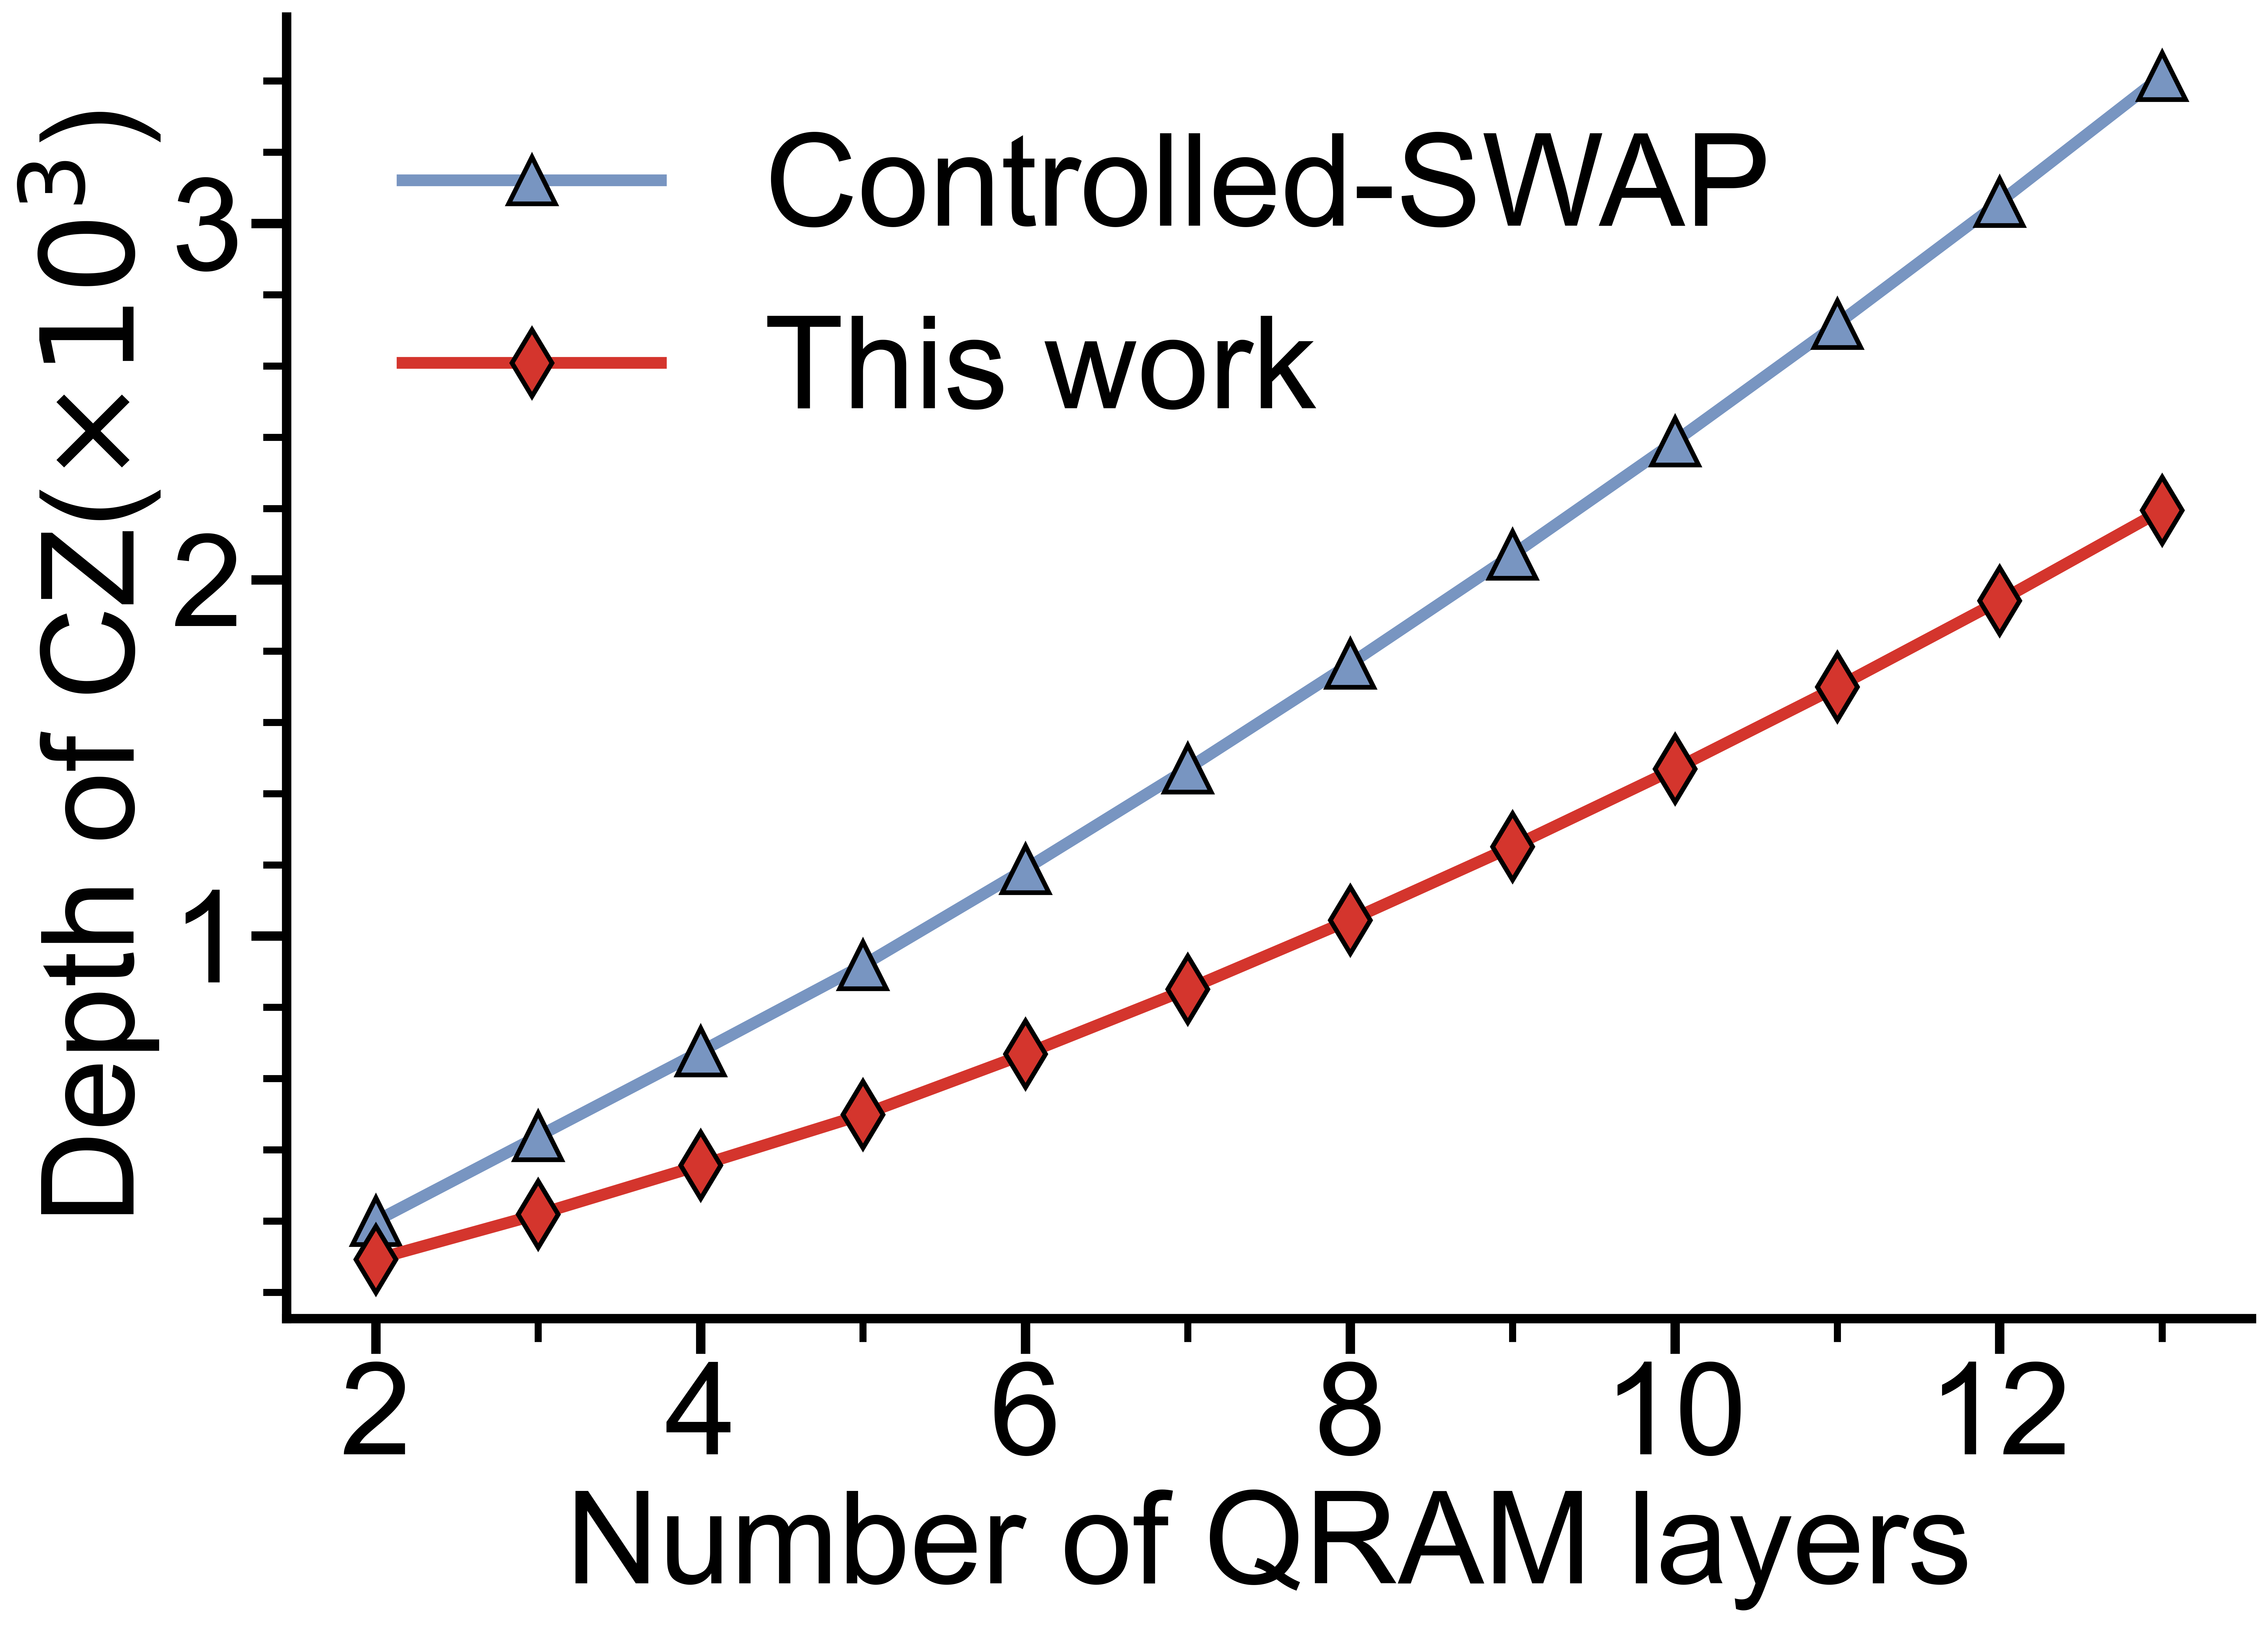

In [20]:
fig, ax = plt.subplots()
from matplotlib.ticker import AutoMinorLocator
fontsize=55
plt.rcParams.update({
    'font.size': fontsize,
    'font.sans-serif': 'Arial',
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'legend.fontsize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'lines.markersize': 20,
    'lines.linewidth': 5.0,
    'axes.linewidth': 4,
    'xtick.major.width': 4,
    'xtick.major.size': 15,
    'ytick.major.width': 4,
    'ytick.major.size': 15,
    'xtick.minor.width': 3,
    'xtick.minor.size': 10,
    'ytick.minor.width': 3,
    'ytick.minor.size': 10,
    'figure.dpi': 600,
    "pdf.fonttype": 42,
    "ps.fonttype": 42,
    'figure.figsize': (15, 10)  # 双栏尺寸：18cm → 7.2 inches
})
x = data_noload.level
colors = ["#7895C1","#D4352D"]
# ax.plot(x, raw_czdepth, label='H tree mapping', marker='o', color='#7895C1', linestyle='-')
ax.plot(x, tele_czdepth, label='Controlled-SWAP', marker='^',color=colors[0], linestyle='-', markeredgecolor='k',markeredgewidth=2)
# ax.plot(x, noload_czdepth,label='w/o Data Load', marker='s', markersize=markersize, color=colors[2], linestyle='-')
ax.plot(x, subspace_czdepth, label='This work', marker='d', color=colors[1], linestyle='-', markeredgecolor='k',markeredgewidth=2)
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
ax.set_xlabel('Number of QRAM layers')
ax.set_ylabel('Depth of CZ' + r'($\times 10^3$)')
ax.set_xticks(np.arange(2,14,2))
ax.set_xticks(np.arange(2,14,1), minor=True)
ax.set_xticklabels(np.arange(2,14,2))
# ax.grid(True,axis='y', which='major', linestyle=':', linewidth=2)
# ax.grid(True,axis='y', which='minor', linestyle='--',linewidth=1)
# ax.set_xlim(2.5,10.5)
## hidden the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks(np.arange(1,4)*1e3)
ax.set_yticklabels(np.arange(1,4))
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.set_yscale('log')
ax.legend(loc='upper left',frameon=False)
plt.savefig('figs/Fig1c_cz_gate_depth_vs_qram_level.svg', bbox_inches='tight')